<a href="https://colab.research.google.com/github/sahildalmia/face1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

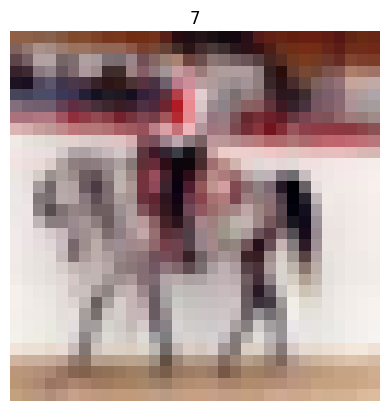

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 1024)             

array([6])

In [12]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load data
dataset_name = 'cifar10'
(train_dataset, test_dataset), dataset_info = tfds.load(name=dataset_name,
													split=['train', 'test'],
													shuffle_files=True,
													with_info=True,
													as_supervised=True)
image, label = next(iter(train_dataset.take(1111)))

plt.imshow(image)
plt.title(label.numpy())
plt.axis('off')
plt.show()


# Get the number of classes in the dataset
num_classes = dataset_info.features['label'].num_classes
num_classes

# Preprocess the data
def preprocess_data(image, label):
	# Convert image to float32 and normalize between 0 and 1
	image = tf.cast(image, tf.float32) / 255.0
	return image, label

# Apply preprocessing to the datasets
train_dataset = train_dataset.map(preprocess_data)
test_dataset = test_dataset.map(preprocess_data)
# Step 3: Build the model
input_dim = (32, 32, 3)

model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_dim),
	tf.keras.layers.MaxPooling2D((2, 2)),
	tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
	tf.keras.layers.MaxPooling2D((2, 2)),
	tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(64, activation='relu'),
	tf.keras.layers.Dense(num_classes, activation='softmax')
])
# Print the model summary
model.summary()
#Generate the model graph
tf.keras.utils.plot_model(model, show_shapes=True)
#Compile the model
model.compile(optimizer='adam',
			loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
			metrics=['accuracy'])
batch_size = 128
num_epochs = 20
# To process the dataset in batches create the batches of batch_size
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size)

#Train the model
model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
# create a custom array of image size
new_image = tf.constant(np.random.rand(32, 32, 3), dtype=tf.float64)
# Extend the dimension 4D
new_image = tf.expand_dims(new_image, axis=0)

# Prediction
predictions = model.predict(new_image)
# predicted label
pred_label = tf.argmax(predictions, axis =1)
pred_label.numpy()



